In [9]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

data_name = 'Sentiment_Analysis_Zero_Shot_Multi_Term_3.5_instruct.csv'

INPUT_PATH = '../../Datasets/Evaluations/Sentiment Analysis/{data_name}'
INPUT_PATH = INPUT_PATH.format(data_name=data_name)
OUTPUT_PATH = '../Datasets/Evaluations/Sentiment Analysis/Eval_Output/Evaluation_{data_name}'
OUTPUT_PATH = OUTPUT_PATH.format(data_name=data_name)
PROMPT_NAME = 'prompt_3_zeroshot_single_term'
MODEL = 'gpt-3.5-turbo'

df_data = pd.read_csv(INPUT_PATH)
df_data = df_data.rename(columns={'polarity': 'y_true'})
df_data = df_data.rename(columns={'polarity_pred': 'y_pred'})




In [10]:
df_data.head()

,Unnamed: 0,text_id,term_id,text,term,y_true,y_pred,prompt_name,prompt
0,0,0,0,"Amusing details distinguish desserts, from dul...",desserts,positive,neutral,prompt_multi_term_zeroshot,Task: Analyze the sentiment of specific terms ...
1,1,0,1,"Amusing details distinguish desserts, from dul...",dulce de leche ice-cream,neutral,positive,prompt_multi_term_zeroshot,Task: Analyze the sentiment of specific terms ...
2,2,0,2,"Amusing details distinguish desserts, from dul...",chocolate sauce tic-tac-toe,neutral,neutral,prompt_multi_term_zeroshot,Task: Analyze the sentiment of specific terms ...
3,3,0,3,"Amusing details distinguish desserts, from dul...",poached pineapple,neutral,neutral,prompt_multi_term_zeroshot,Task: Analyze the sentiment of specific terms ...
4,4,1,4,The server was so busy the night we visited th...,server,negative,negative,prompt_multi_term_zeroshot,Task: Analyze the sentiment of specific terms ...


In [11]:
def multiclass_eval(model, prompt, df):
    y_true = df['y_true']
    y_true = df['y_pred']
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    x_axis_labels = ['negative', 'neutral', 'positive']
    y_axis_labels = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    print(metrics.classification_report(df['y_true'], df['y_pred'], output_dict=False))
    classification_report = metrics.classification_report(df['y_true'], df['y_pred'], output_dict=True)
    df = pd.DataFrame(classification_report)
    return df
    

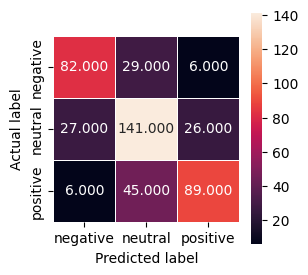

              precision    recall  f1-score   support

    negative       0.71      0.70      0.71       117
     neutral       0.66      0.73      0.69       194
    positive       0.74      0.64      0.68       140

    accuracy                           0.69       451
   macro avg       0.70      0.69      0.69       451
weighted avg       0.70      0.69      0.69       451



In [12]:
df_eval = multiclass_eval(MODEL, PROMPT_NAME, df_data)

In [5]:
df_eval.head()



,negative,neutral,positive,accuracy,macro avg,weighted avg
precision,0.616438,0.772059,0.644970,0.674058,0.677823,0.692236
recall,0.769231,0.541237,0.778571,0.674058,0.696346,0.674058
f1-score,0.684411,0.636364,0.705502,0.674058,0.675425,0.670290
support,117.000000,194.000000,140.000000,0.674058,451.000000,451.000000


In [6]:
df_eval.to_csv(OUTPUT_PATH, index=False)

OSError: Cannot save file into a non-existent directory: '../Datasets/Evaluations/Sentiment Analysis/Eval_Output'